<a href="https://colab.research.google.com/github/fredericpoitevin/tseries-deconvolution/blob/master/Deconvolution_of_Michael_coronavirus_data-Mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

We are interested in the following scenario:
We have access to two cumulative time-series that we call cause (or _cases_ $C(t)$ the total number of cases at time $t$) and consequence (or _deaths_ $D(t) $ the total number of deaths at time $t$). We assume that consequence is cause convolved with an unknown kernel $K$, and we are interested in inferring the kernel function, or at least its parameters.

Formally, 

$$\frac{\partial D}{\partial \tau}|_{\tau=t} = \sum_{s=0}^{t} K(t-s)\frac{\partial C}{\partial \tau}|_{\tau=s}$$

We have access to samples of the cumulative time-series at fixed time intervals $\Delta t$, we can thus discretize the above equation with finite difference. For $i \geq 1$, we introduce $f_{i} = \frac{F(i\Delta t) - F((i-1)\Delta t)}{\Delta t}$:

$$d_{i} = \sum_{j=1}^{i}k_{ij}c_{j}$$

# Dataset curated by Michael
We recommend going through the **Illustrative example** below before reading this.

We begin here by importing the data and zero-pad it before the time origin.

In [5]:
uploaded = files.upload()

Saving tseries_sigmoid-v3.csv to tseries_sigmoid-v3.csv


In [0]:
pad=True

Total number of days centered on the time origin: 262


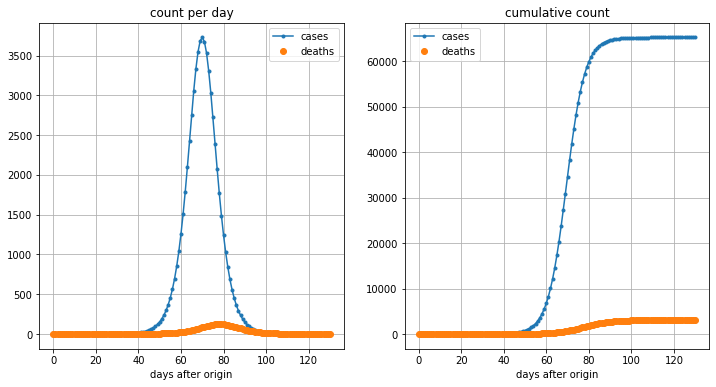

In [7]:
cases, deaths, ndays, nday_zero = get_data('/content/tseries_sigmoid-v3.csv', pad=pad)
display(ndays, c=cases, d=deaths, labels=['cases', 'deaths'], show_cumul=True, pad=pad)

## Kernel extraction

Having loaded the cases and deaths, we proceed to find the convolution kernel between the two:

> center = 130


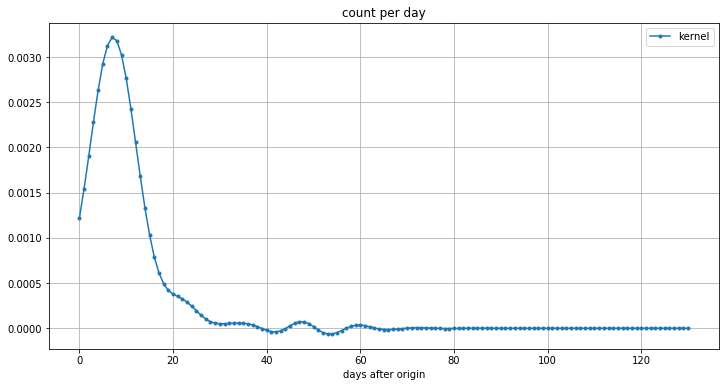

In [8]:
kernel = wiener_deconvolution(c=cases, d=deaths, nsr=1e6, pad=pad)
display(ndays, c=kernel, labels=['kernel'], show_cumul=False, pad=pad)

We can measure the discrepancy between the actual deaths and the ones computed by convoluting the cases with the newly obtained kernel:

>>> RMS = 2.39e-01 | Smoothness = 1.12e-07


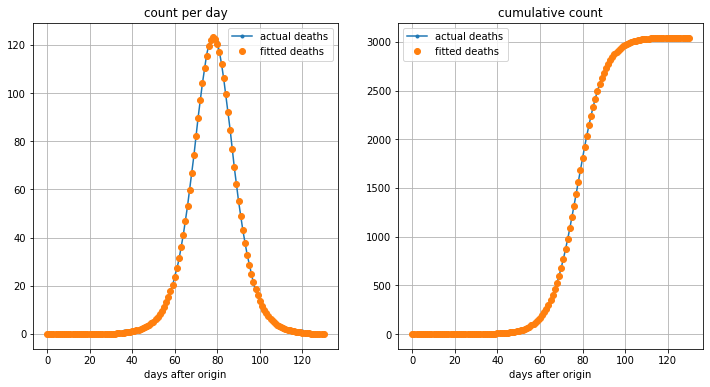

In [56]:
rms, smoothness = measure_rms(ndays, c=cases, k=kernel, d=deaths, pad=pad)

We explore around the chosen SNR value to refine our SNR choice to trade between a good fit and a smooth kernel

NSR = 10000.0
> center = 130
>>> RMS = 2.21e-01 | Smoothness = 8.44e-06


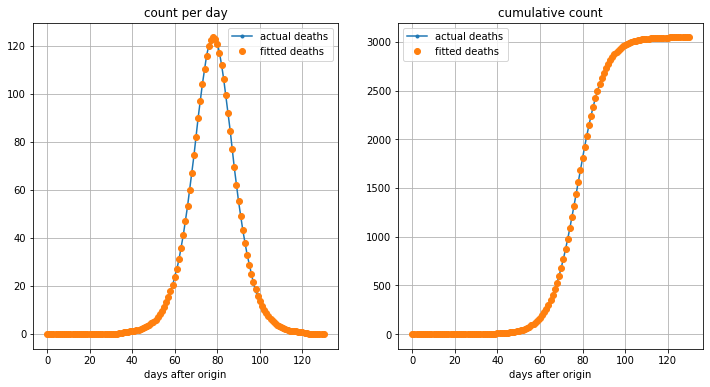

NSR = 17782.794100389227
> center = 130
>>> RMS = 2.23e-01 | Smoothness = 3.32e-06


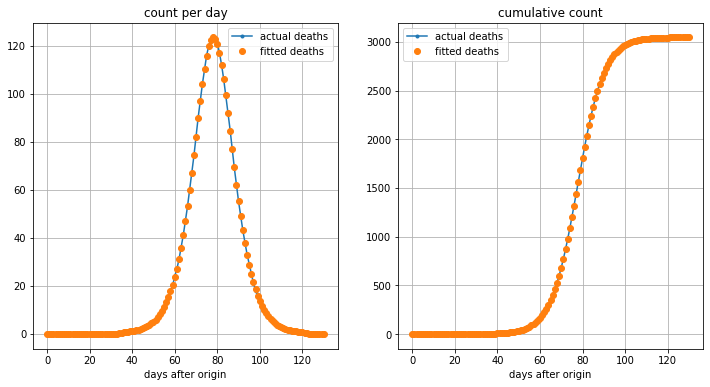

NSR = 31622.776601683792
> center = 130
>>> RMS = 2.25e-01 | Smoothness = 1.39e-06


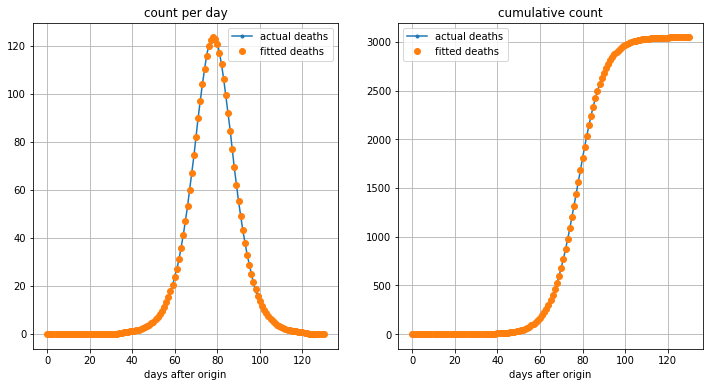

NSR = 56234.13251903491
> center = 130
>>> RMS = 2.26e-01 | Smoothness = 6.41e-07


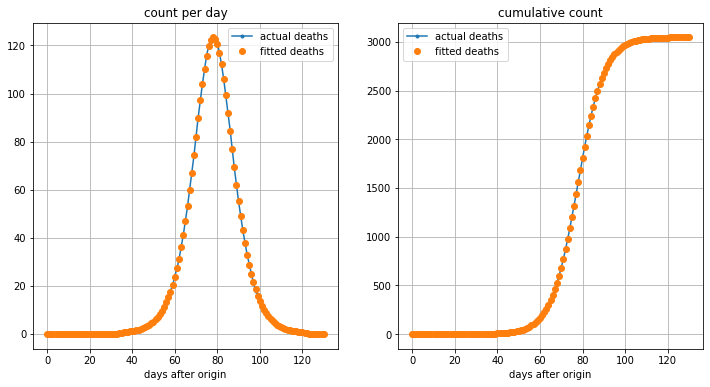

NSR = 100000.0
> center = 130
>>> RMS = 2.28e-01 | Smoothness = 3.39e-07


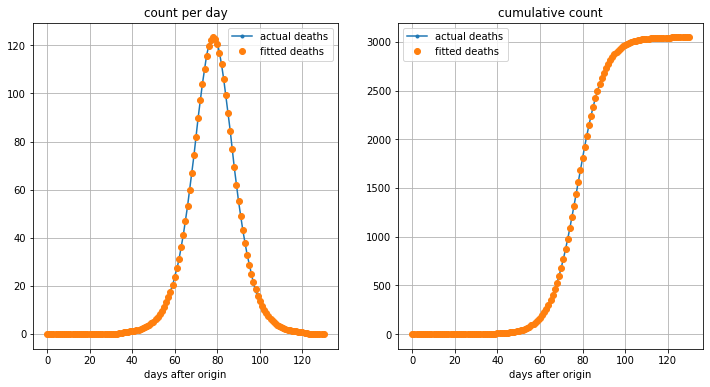

NSR = 177827.94100389228
> center = 130
>>> RMS = 2.29e-01 | Smoothness = 2.13e-07


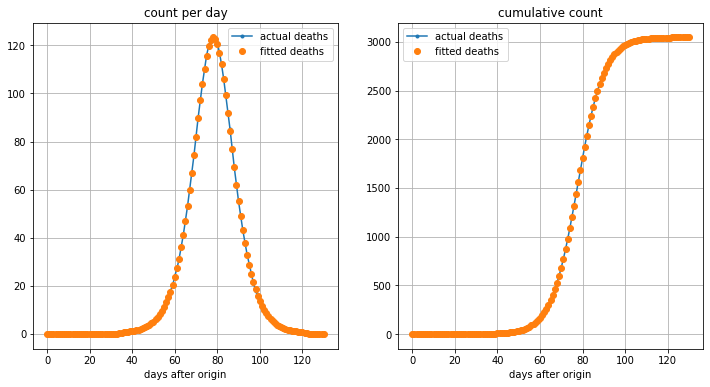

NSR = 316227.7660168379
> center = 130
>>> RMS = 2.31e-01 | Smoothness = 1.58e-07


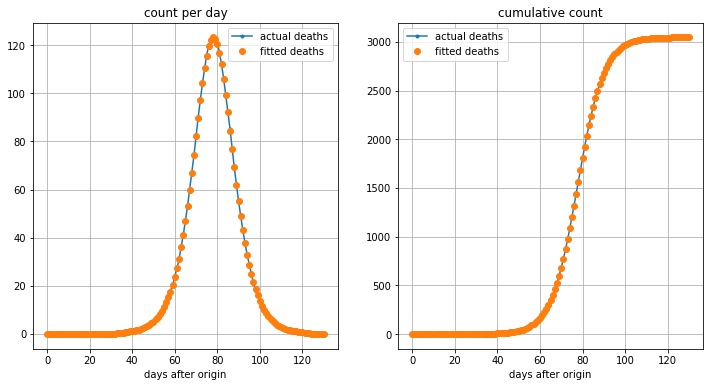

NSR = 562341.3251903491
> center = 130
>>> RMS = 2.34e-01 | Smoothness = 1.30e-07


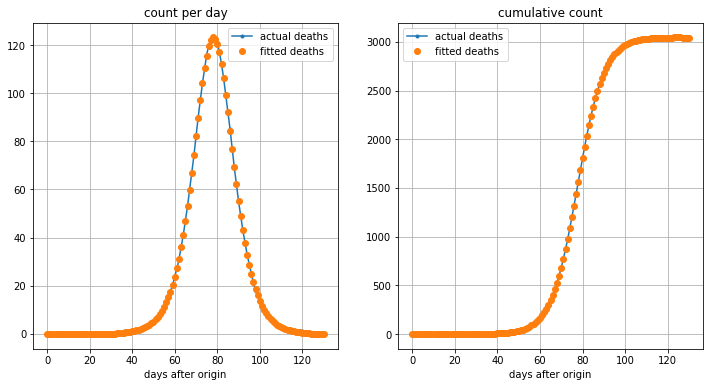

NSR = 1000000.0
> center = 130
>>> RMS = 2.39e-01 | Smoothness = 1.12e-07


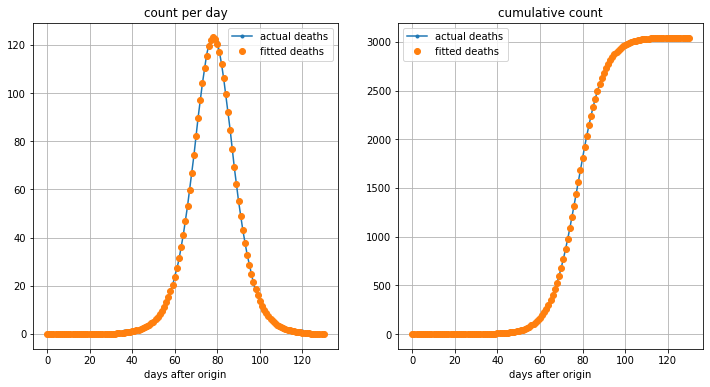

NSR = 1778279.410038923
> center = 130
>>> RMS = 2.49e-01 | Smoothness = 9.74e-08


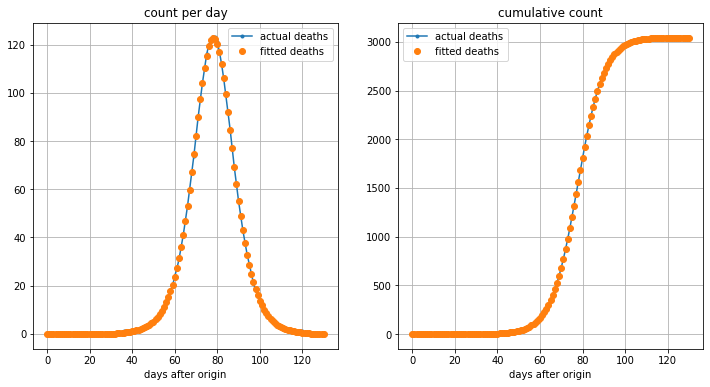

NSR = 3162277.6601683795
> center = 130
>>> RMS = 2.71e-01 | Smoothness = 8.52e-08


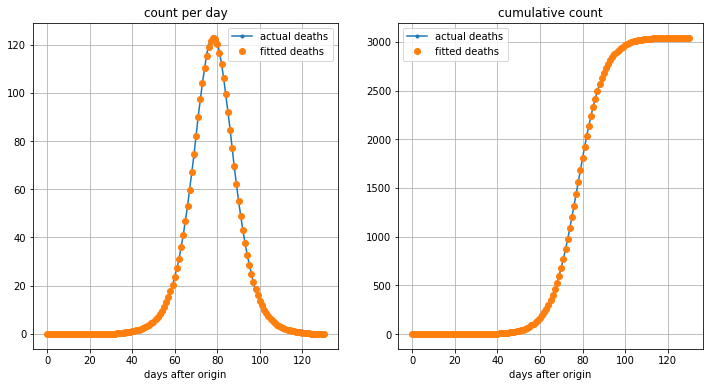

NSR = 5623413.251903491
> center = 130
>>> RMS = 3.16e-01 | Smoothness = 7.43e-08


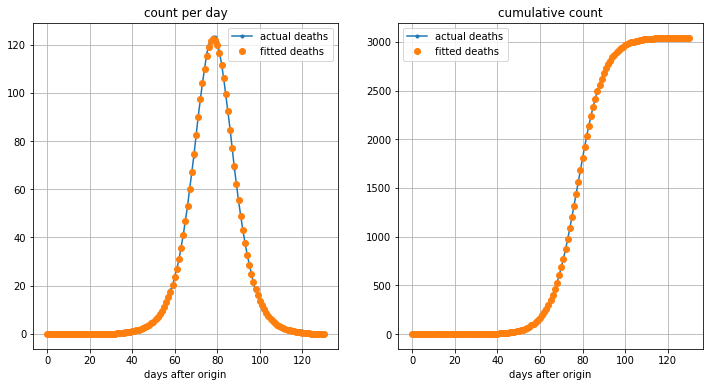

NSR = 10000000.0
> center = 130
>>> RMS = 4.06e-01 | Smoothness = 6.42e-08


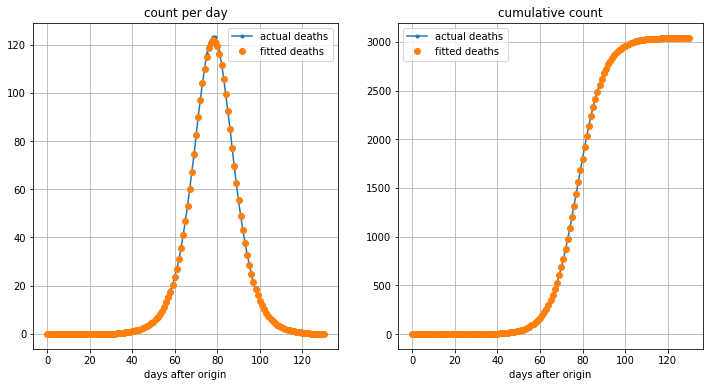

In [59]:
nsr_list = np.logspace(4, 7, num=13)
rms_list = []
smoothness_list = []
#
for nsr in nsr_list:
  print('NSR = {}'.format(nsr))
  kernel = wiener_deconvolution(c=cases, d=deaths, nsr=nsr, pad=pad)
  rms, smoothness = measure_rms(ndays, c=cases, k=kernel, d=deaths, pad=pad)
  rms_list.append(rms)
  smoothness_list.append(smoothness)

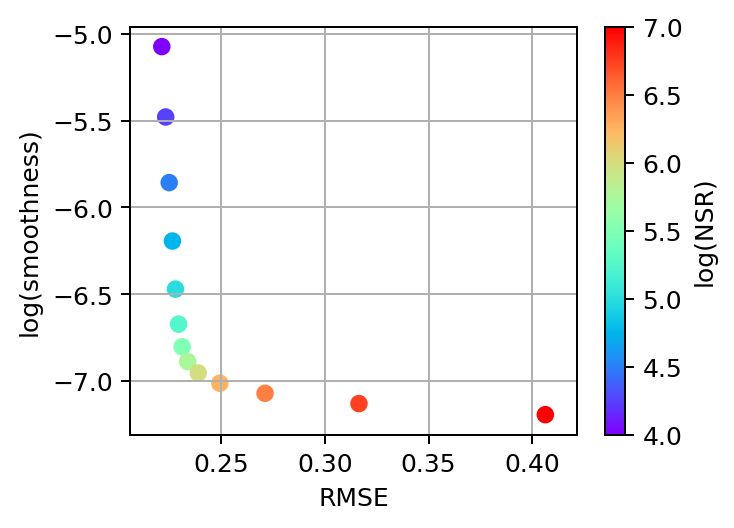

In [60]:
fig, ax = plt.subplots(figsize=(4,3),dpi=180)
sc = ax.scatter(rms_list, np.log10(smoothness_list), c=np.log10(nsr_list), cmap='rainbow')
ax.set_xlabel('RMSE')
ax.set_ylabel('log(smoothness)')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('log(NSR)')
plt.grid()
plt.show()

> center = 130


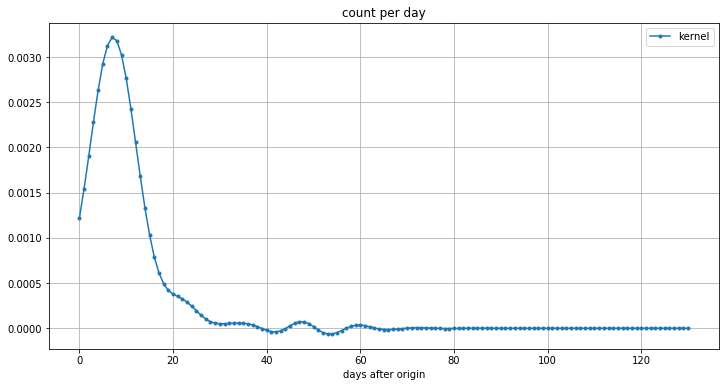

In [61]:
kernel = wiener_deconvolution(c=cases, d=deaths, nsr=1e6, pad=pad)
display(ndays, c=kernel, labels=['kernel'], show_cumul=False, pad=pad)

## Kernel fitting

Now that we are happy with the kernel we extracted, we try to interpret it as a known distribution...

Amplitudes: init: [0.003] => refined: [0.00342584]
Widths:     init: [5.] => refined: [5.13553252]
Centers:    init: [10.] => refined: [7.19741641]


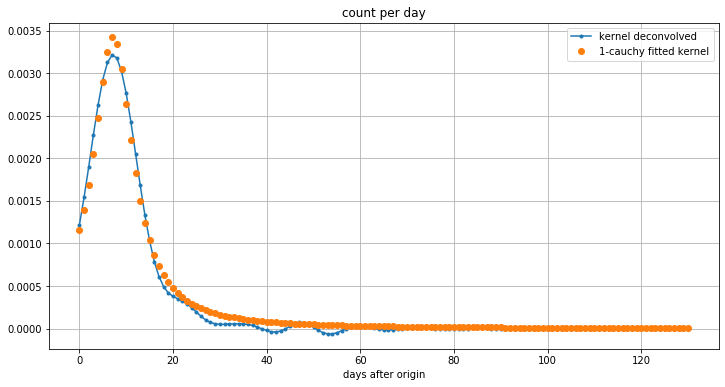

>>> RMS = 3.37e+00 | Smoothness = 1.95e-07


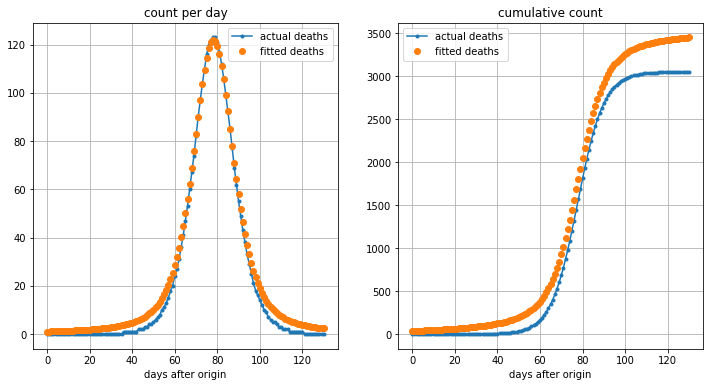

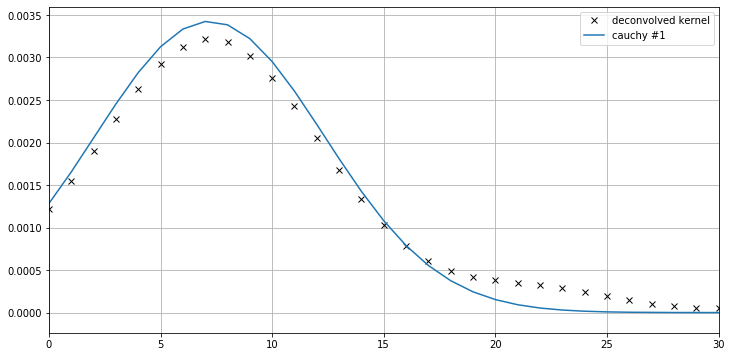

In [131]:
p0=np.array((0.003,5,ndays+10))
function=cauchy
function_type='cauchy'
#
fit_mix(function, function_type, p0, ndays, k=kernel,c=cases,d=deaths,pad=pad)

Amplitudes: init: [0.003] => refined: [0.00312533]
Widths:     init: [5.] => refined: [5.48003277]
Centers:    init: [10.] => refined: [7.18982911]


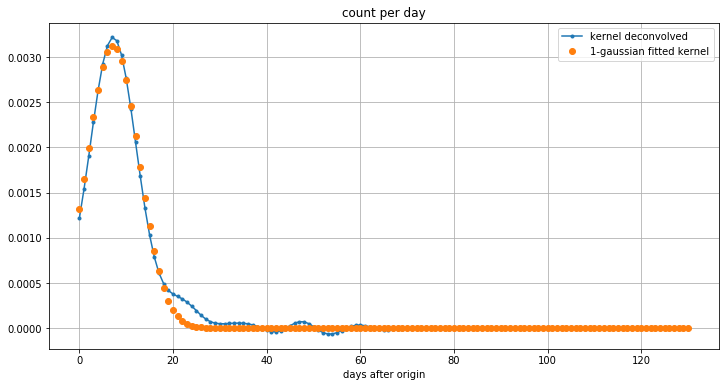

>>> RMS = 2.78e+00 | Smoothness = 7.78e-08


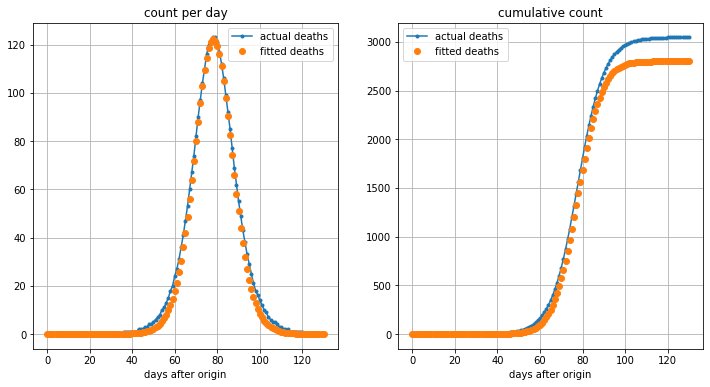

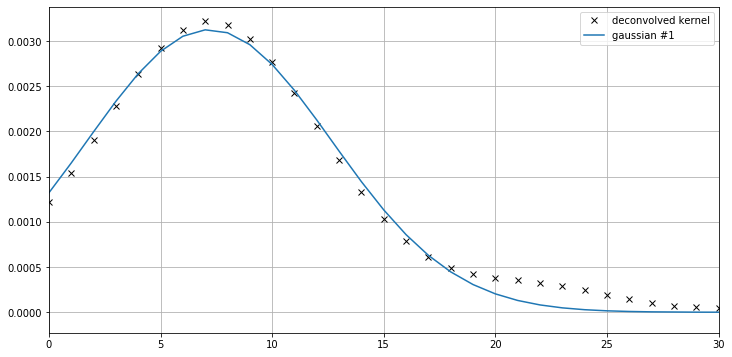

In [130]:
p0=np.array((0.003,5,ndays+10))
function=gaussian_sum
function_type='gaussian'
#
fit_mix(function, function_type, p0, ndays, k=kernel,c=cases,d=deaths,pad=pad)

Amplitudes: init: [0.003  0.0003] => refined: [0.00316151 0.0002617 ]
Widths:     init: [5. 5.] => refined: [5.32354576 3.20325982]
Centers:    init: [ 5. 20.] => refined: [ 7.12573025 22.54778495]


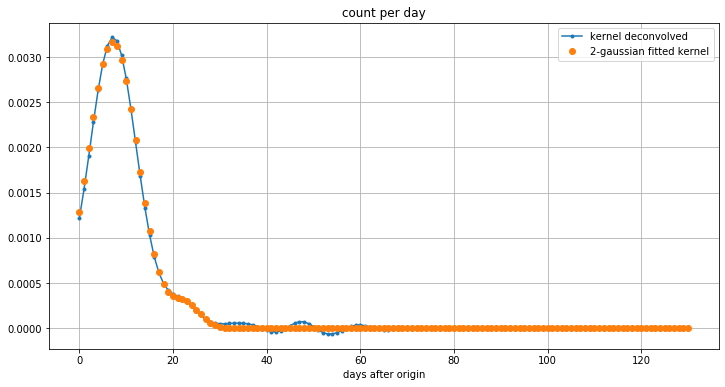

>>> RMS = 2.17e+00 | Smoothness = 9.07e-08


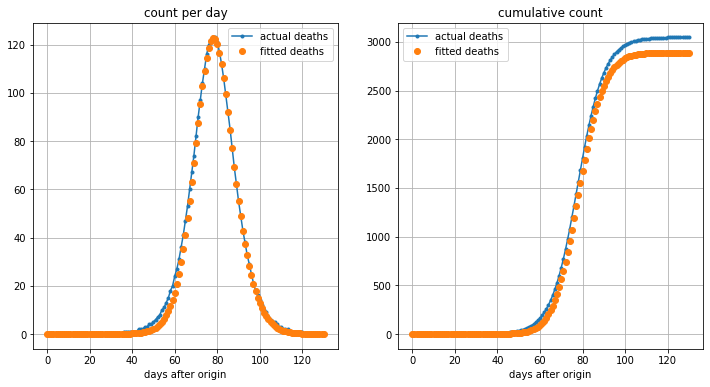

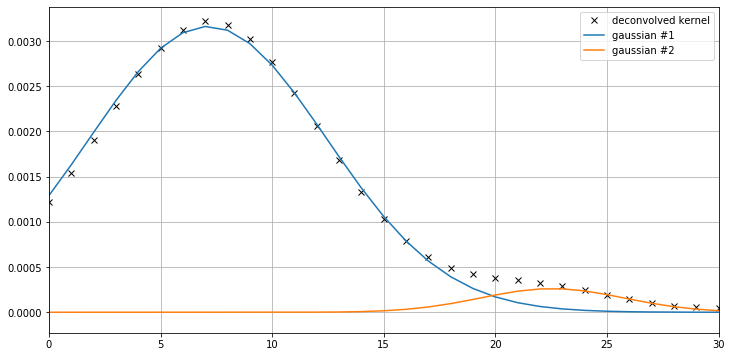

In [132]:
p0=np.array((0.003,0.0003,
             5,5,
             ndays+5,ndays+20))
function=gaussian_sum
function_type='gaussian'
#
fit_mix(function, function_type, p0, ndays, k=kernel,c=cases,d=deaths,pad=pad)

Amplitudes: init: [0.0003 0.003  0.0003] => refined: [0.0002741  0.00312911 0.00027825]
Widths:     init: [5. 5. 5.] => refined: [7.52277446 4.83852605 4.63620999]
Centers:    init: [ 0.  5. 20.] => refined: [-3.66074752  7.36263794 21.14059761]


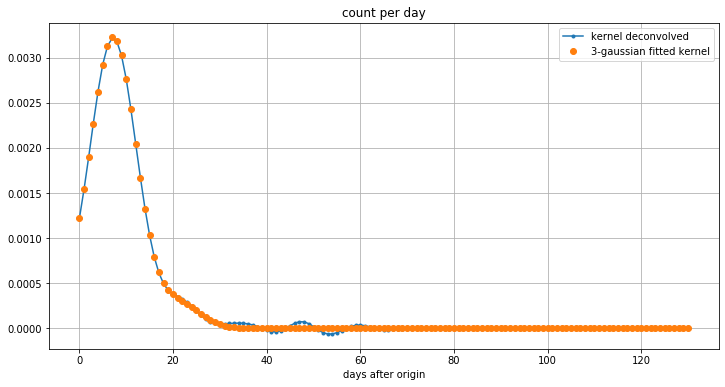

>>> RMS = 3.86e-01 | Smoothness = 1.05e-07


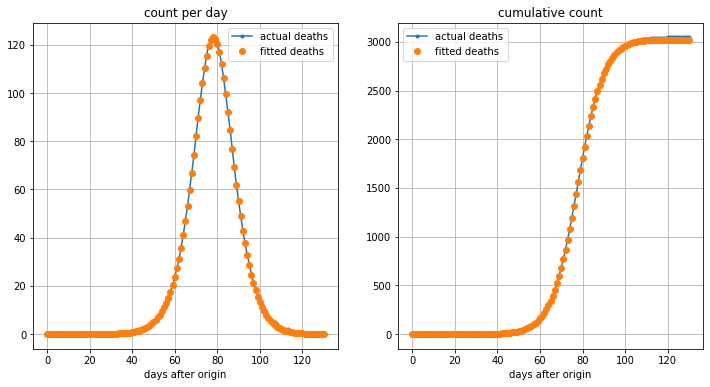

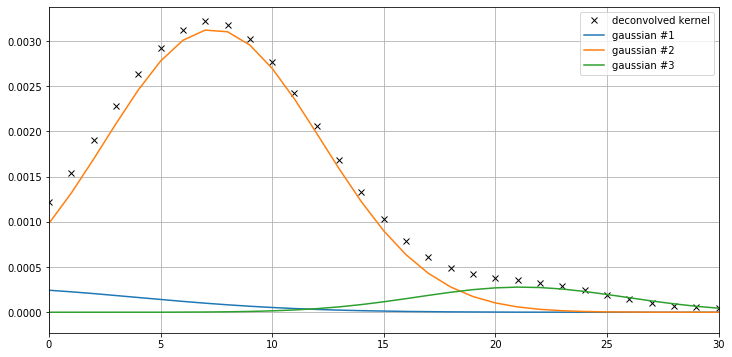

In [133]:
p0=np.array((0.0003,0.003,0.0003,
             5,5,5,
             ndays,ndays+5,ndays+20))
function=gaussian_sum
function_type='gaussian'
#
fit_mix(function, function_type, p0, ndays, k=kernel,c=cases,d=deaths,pad=pad)

Amplitudes: init: [0.0003 0.003  0.0003 0.0001] => refined: [0.0001121  0.00297009 0.00016475 0.00025104]
Widths:     init: [5. 5. 5. 5.] => refined: [ 4.10032083  4.83256813  2.66830832 13.48316088]
Centers:    init: [ 0.  5. 20. 20.] => refined: [-6.58716894  7.21999056 21.78826538  7.07142192]


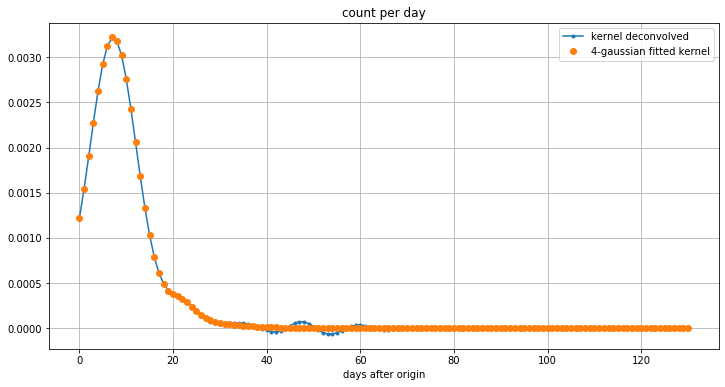

>>> RMS = 2.51e-01 | Smoothness = 1.06e-07


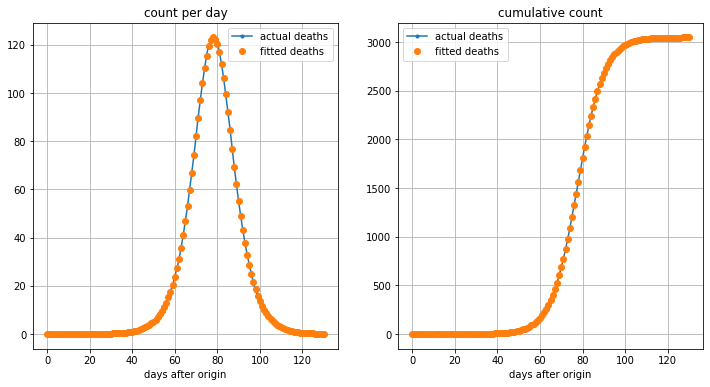

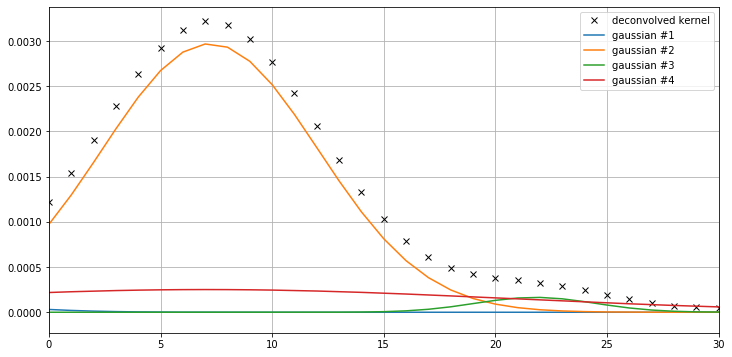

In [134]:
p0=np.array((0.0003,0.003,0.0003,0.0001,
             5,5,5,5,
             ndays,ndays+5,ndays+20,ndays+20))
function=gaussian_sum
function_type='gaussian'
#
fit_mix(function, function_type, p0, ndays, k=kernel,c=cases,d=deaths,pad=pad)

Amplitudes: init: [0.0003 0.003  0.0003 0.0001 0.0001] => refined: [9.28462299e-05 3.02773651e-03 1.79372715e-04 7.14401326e-05
 1.92063592e-04]
Widths:     init: [5. 5. 5. 5. 5.] => refined: [ 3.12568239  4.89337754  2.7811114   4.83569623 13.98715283]
Centers:    init: [ 0.  5. 20. 20. 20.] => refined: [-5.44304822  7.20207292 21.74078974 -9.28431782  8.14710816]


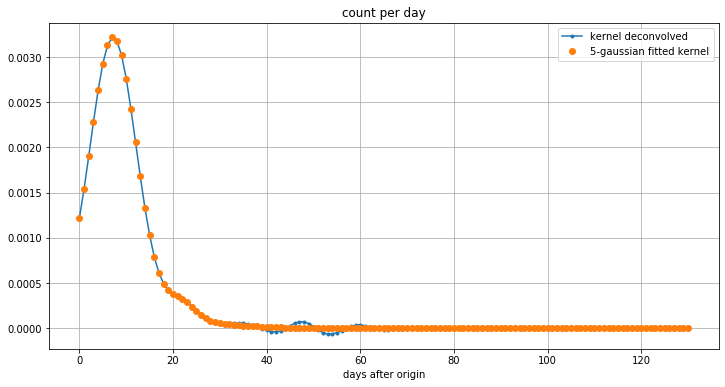

>>> RMS = 2.53e-01 | Smoothness = 1.06e-07


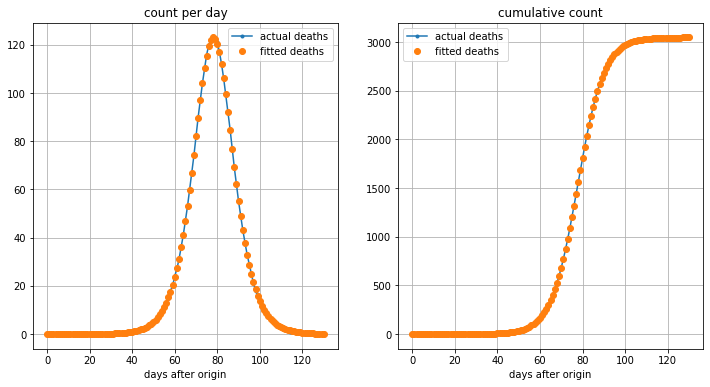

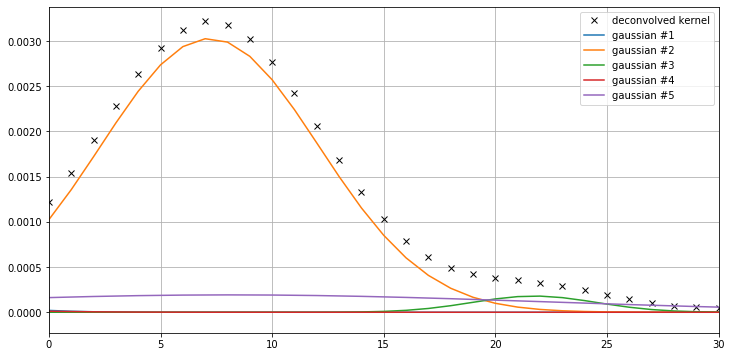

In [135]:
p0=np.array((0.0003,0.003,0.0003,0.0001,0.0001,
             5,5,5,5,5,
             ndays,ndays+5,ndays+20,ndays+20,ndays+20))
function=gaussian_sum
function_type='gaussian'
#
fit_mix(function, function_type, p0, ndays, k=kernel,c=cases,d=deaths,pad=pad)

# Toolkit

In [0]:
# load all libraries
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from scipy.optimize import curve_fit


In [0]:
def fit_kernel(kernel, function, p0=None):
  popt, pcov = curve_fit(function, np.arange(kernel.shape[0]), kernel, p0=p0)
  kernel_fitted = function(np.arange(kernel.shape[0]), *popt)
  return kernel_fitted, popt

def gaussian_sum(x,*params, normalize=False):
  n=np.int(len(params)/3)
  amplitude = params[:n]
  sigma     = params[n:2*n]
  center    = params[2*n:3*n]
  y = np.zeros(x.shape)
  for i in np.arange(n):
    y += gaussian(x, amplitude[i], sigma[i], center[i])
  return y

def gaussian(x, *params, normalize=False):
  amplitude = params[0]
  sigma     = params[1]
  center    = params[2]
  if normalize:
    amplitude /= np.sqrt(2*np.pi)*sigma
  y = amplitude*np.exp(-0.5*((x-center)/sigma)**2)
  return y

def cauchy(x, *params, normalize=False):
  amplitude = params[0]
  sigma     = params[1]
  center    = params[2]
  if normalize:
    amplitude = 1/(np.pi*sigma)
  y = amplitude/(1 + ((x-center)/sigma)**2)
  return y

def define_time_points(ndays):
  """define_time_points(ndays)
  """
  return np.arange(-ndays,ndays)

def synthesize_tseries(t, function, *params, normalize=False):
  """synthesize_tseries(t, function, *params)
  Arguments:
  ---------
  - t: time-points (array. Mandatory)
  - function: shape of the distribution
  - params: parameters of function 
  Returns:
  -------
  tseries: function evaluated at t
  """
  tseries = function(t, *params, normalize=normalize)
  return tseries

def measure_rms(ndays, c=None, k=None, d=None, do_display=True, labels=['actual deaths','fitted deaths'], pad=True):
  """rms
  """
  d_new = do_convolution(k=k, c=c, pad=pad)
  #d_new = np.convolve(k,c,mode='same')
  if pad:
    diff = d_new[ndays:]-d[ndays:]
    #rms = np.linalg.norm(d_new[ndays:]-d[ndays:])
  else:
    diff = d_new-d
    #rms = np.linalg.norm(d_new-d)
  rms = np.sqrt(np.mean(diff**2))
  smoothness = np.sum(np.abs(np.convolve(k, [1,-2,1], 'same'))**2)
  print('>>> RMS = {:.2e} | Smoothness = {:.2e}'.format(rms, smoothness))
  if do_display:
    display(ndays, c=d, d=d_new, labels=labels, pad=pad)
  return rms,smoothness

def do_convolution(k=None, c=None, pad=True):
  d_new = np.convolve(k,c,mode='same')
  if not pad:
    # for some reason we need to recenter
    center = get_array_center(c)
    d_new = np.roll(d_new,center)
  return d_new

def wiener_deconvolution(c=None,d=None,nsr=0.0,pad=True):
  """wiener_deconvolution
  """
  c_fft = np.fft.fft(c)
  d_fft = np.fft.fft(d)
  k_fft = d_fft*np.conj(c_fft)/(np.abs(c_fft)**2 + nsr)
  kernel = np.real(np.fft.ifft(k_fft))
  if pad:
    center = get_array_center(c)
    kernel = np.roll(kernel,center)
  return kernel

def get_array_center(c):
  length = c.shape[0]
  if length % 2 == 0:
    center = np.int(length/2)-1
  else:
    center = np.int(length/2)
  print('> center = {}'.format(center))
  return center

def display(ndays,c=None, d=None, labels=['cause', 'consequence'], show_cumul=True, pad=True):
  ncol=1
  if show_cumul:
    ncol=2
  trange=np.arange(ndays)
  if pad:
    # if we padded, the origin is in the center
    tzero = ndays
  else:
    tzero=0
  fig = plt.figure(figsize=(12,6))
  plt.subplot(1,ncol,1)
  plt.title('count per day')
  plt.xlabel('days after origin')
  if c is not None:
    plt.plot(trange,c[tzero:], '.-', label=labels[0])
  if d is not None:
    plt.plot(trange,d[tzero:], 'o', label=labels[1])
  plt.grid()
  plt.legend()
  if show_cumul:
    plt.subplot(1,ncol,2)
    plt.title('cumulative count')
    plt.xlabel('days after origin')
    if c is not None:
      plt.plot(trange,np.cumsum(c)[tzero:], '.-', label=labels[0])
    if d is not None:
      plt.plot(trange,np.cumsum(d)[tzero:], 'o', label=labels[1])
    plt.grid()
    plt.legend()
  plt.show()

def display_sum_of_functions(ndays, ngauss, kernel, params, ftype='gaussian', window=None):
  fig = plt.figure(figsize=(12,6))
  if window is not None:
    plt.xlim(window[0],window[1])
  plt.plot(np.arange(-ndays,ndays),kernel, 'kx', label='deconvolved kernel')
  for igauss in np.arange(ngauss):
    plt.plot(np.arange(-ndays,ndays),gaussian(np.arange(-ndays,ndays), 
                        params[igauss], 
                        params[igauss+ngauss], 
                        params[igauss+2*ngauss]-ndays), label=str(ftype)+' #{}'.format(igauss+1))
  plt.legend()
  plt.grid()
  plt.show()

def get_data(filename, pad=True):
  data        = np.genfromtxt(filename, delimiter=',', comments='#')
  ndays       = data.shape[0]
  if pad:
    nday_zero   = ndays
    data_pad    = np.zeros(data.shape) 
    data_padded = np.stack((data_pad, data), axis=0).reshape(2*data.shape[0], data.shape[1])
    print('Total number of days centered on the time origin: {}'.format(data_padded.shape[0]))
    cases  = data_padded[:,2]
    deaths = data_padded[:,3]
  else:
    nday_zero = 0
    cases = data[:,2]
    deaths = data[:,3]
    print('Total number of days centered starting at the time origin: {}'.format(data.shape[0]))
  return cases, deaths, ndays, nday_zero

def write_kernel_to_file(filename, 
                         first_line='#',
                         second_line='#',
                         third_line='#',
                         fourth_line='#',
                         fields='# time-pt , cases, kernel  , kfitted , deaths  , dfitted \n',
                         timestamps=None,
                         cases=None,
                         kernel=None, kernel_fitted=None,
                         deaths=None, deaths_fitted=None,):
  file_test = open('/content/{}'.format(filename), 'w')
  file_test.write('{}'.format(first_line))
  file_test.write('{}'.format(second_line))
  file_test.write('{}'.format(third_line))
  file_test.write('{}'.format(fourth_line))
  file_test.write('{}'.format(fields))
  i=0
  for t in timestamps:
    string = 6*'{:.2e}, '+'\n'
    file_test.write(string.format(t,cases[i],
                                  kernel[i],kernel_fitted[i],
                                  deaths[i],deaths_fitted[i]))
    i+=1
  file_test.close()

def fit_mix(function, function_type, p0, ndays, k=None,c=None,d=None,pad=True):
  #
  nmix=np.int(p0.shape[0]/3)
  kernel_fitted, params = fit_kernel(kernel, function, p0=p0)
  print('Amplitudes: init: {} => refined: {}'.format(p0[0:nmix], params[0:nmix]))
  print('Widths:     init: {} => refined: {}'.format(p0[nmix:2*nmix], params[nmix:2*nmix]))
  print('Centers:    init: {} => refined: {}'.format(p0[2*nmix:4*nmix]-ndays, params[2*nmix:4*nmix]-ndays))
  display(ndays, c=kernel, d=kernel_fitted, 
          labels=['kernel deconvolved',str(nmix)+'-'+np.str(function_type)+' fitted kernel'], show_cumul=False, pad=pad)
  rms_fitted = measure_rms(ndays, c=cases, k=kernel_fitted, d=deaths, pad=pad)
  display_sum_of_functions(ndays, nmix, kernel, params, ftype=function_type, window=[0,30])
  #
  write_kernel_to_file(str(nmix)+'-'+function_type+'.csv',
                      first_line='# kernel fit\n',
                      second_line='# initial parameters: I={} sigma={} center={}\n'.format(p0[0:nmix], 
                                                                                            p0[nmix:2*nmix],
                                                                                            p0[2*nmix:4*nmix]-ndays),
                      third_line='# final parameters  : I={} sigma={} center={}\n'.format(params[0:nmix], 
                                                                                          params[nmix:2*nmix], 
                                                                                          params[2*nmix:4*nmix]-ndays),
                      fourth_line='# RMSE(death vs kernel*case) = {:.2e}\n'.format(rms_fitted[0]),
                      timestamps=np.arange(-ndays,ndays),
                      cases=cases,
                      kernel=kernel, kernel_fitted=kernel_fitted,
                      deaths=deaths, deaths_fitted=do_convolution(k=kernel_fitted, c=cases, pad=pad))